<a href="https://colab.research.google.com/github/kiet1043/AI-homeworks/blob/main/Conlacnguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=01dc0cc776177765a0d9caffe74a7c3f653b7b9e9f3692ba2bd47d79d2cb8c0e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-2-09798ef2c14a>:53: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=0,cmap='viridis',anpha=0.5)    #Hinh chieu cua be mat len mat phang z
<ipython-input-2-09798ef2c14a>:54: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=4,cmap='viridis',anpha=0.5)   #Hinh chieu cua be mat len mat phang x
<ipython-input-2-09798ef2c14a>:55: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=1,cmap='viridis',anpha=0.5)   #Hinh chieu cua be mat len mat phang y


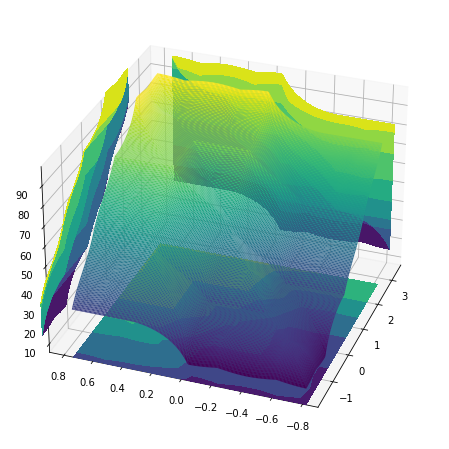

In [2]:
#ANFIS: he thong mờ neural
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
#________________________________________________
universe = np.linspace(-np.pi/2,np.pi,180)     #Mien phổ quát của alpha
universe1 = np.linspace(-np.pi/4,np.pi/4,180)   #Mien phổ quát của da/dt
universe2 = np.linspace(0,100,100)   #Mien phổ quát của F
alpha = ctrl.Antecedent(universe,'Alpha')
da = ctrl.Antecedent(universe1,'da/dt')
force = ctrl.Consequent(universe2,'F')
#________________________________________________
direct = ['LN','N','ZE','P','LP']            
xuhuong = ['-2','-1','0','1','2']                    
alpha.automf(names = direct)                 
da.automf(names = xuhuong)
force.automf(names = direct)

#________________________________________________
rule0 = ctrl.Rule(antecedent=((alpha['LN']&da['-2']) | (alpha['N']&da['-2']) | (alpha['LN']&da['-1']) | (alpha['LN']&da['0'])),consequent=force['LN'],label='ruleLN')

rule1 = ctrl.Rule(antecedent=((alpha['ZE']&da['-2']) | (alpha['N']&da['-1']) | (alpha['ZE']&da['-1']) | (alpha['N']&da['0']) | 
                              (alpha['LN']&da['1']) | (alpha['LN']&da['2'])),consequent=force['N'],label='ruleN')

rule2 = ctrl.Rule(antecedent=((alpha['P']&da['-2']) | (alpha['P']&da['-1']) | (alpha['ZE']&da['0']) | (alpha['N']&da['1']) | (alpha['N']&da['2'])),consequent=force['ZE'],label='ruleZE')

rule3 = ctrl.Rule(antecedent=((alpha['LP']&da['-2']) | (alpha['LP']&da['-1']) | (alpha['P']&da['0']) | (alpha['ZE']&da['1']) | 
                              (alpha['P']&da['1']) | (alpha['ZE']&da['2'])),consequent=force['P'],label='ruleP')

rule4 = ctrl.Rule(antecedent=((alpha['LP']&da['0']) | (alpha['LP']&da['1']) | (alpha['LP']&da['2']) | (alpha['P']&da['2'])),consequent=force['LP'],label='ruleLP')

system = ctrl.ControlSystem([rule0,rule1,rule2,rule3,rule4])                       # Gan luat
force_sim = ctrl.ControlSystemSimulation(system,flush_after_run=180*180+1)   # Gan qua trinh dieu khien mo phong dua theo luat
#Tao luoi ve do thi
upsampled = np.linspace(-np.pi/2,np.pi,180)
upsampled1 = np.linspace(-np.pi/4,np.pi/4,180)
x, y = np.meshgrid(upsampled, upsampled1)
z = np.zeros_like(x)
#Ve gia tri cua truc
for i in range(180):
  for j in range(180):
    force_sim.input['Alpha'] = x[i, j]
    force_sim.input['da/dt'] = y[i, j]
    force_sim.compute()
    z[i, j] = force_sim.output['F']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap='viridis', linewidth = 0.4, antialiased = True)   #Ve be mat dieu khien
cset = ax.contourf(x,y,z,zdir='z',offset=0,cmap='viridis',anpha=0.5)    #Hinh chieu cua be mat len mat phang z
cset = ax.contourf(x,y,z,zdir='x',offset=4,cmap='viridis',anpha=0.5)   #Hinh chieu cua be mat len mat phang x
cset = ax.contourf(x,y,z,zdir='y',offset=1,cmap='viridis',anpha=0.5)   #Hinh chieu cua be mat len mat phang y
ax.view_init(30,200)